In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_fangyou = pd.read_csv("../Data/Fangyou_data/Cleaned/combined_using_similar_columns.csv")
data_fangyou['Data_source'] = 'Best et al. (in prep)'

data_BH = pd.read_csv("../Data/Best&Heckman/BestHeckman+SDSS+wise+LOFAR_better.csv")
# Only selecting data with a classification
data_BH = data_BH[data_BH['Classification'] != 'Radio-loud AGN'] 
data_BH['Data_source'] = 'Best et al. (2012)'

data_mightee = pd.read_csv("../Data/MIGHTEE/Classification/final_gaussian_radio.csv")
# Dropping nan classifications
data_mightee = data_mightee[data_mightee['Classification'].notna()]
data_mightee['Data_source'] = 'Whittam et al. (2022)'

data_BH[['J_flux_corr', 'H_flux_corr', 'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'Peak_flux', 'Total_flux']] /= 1000
data = pd.concat([data_fangyou, data_BH, data_mightee]).reset_index(drop=True)

In [3]:
drop_columns = ['Source_Name',
 'RA',
 'DEC',
 'E_Total_flux',
 'E_Peak_flux',
 'S_Code',
 'EBV',
 'FUV_flux_corr',
 'FUV_fluxerr_corr',
 'NUV_fluxerr_corr',
 'u_fluxerr_corr',
 'Bw_fluxerr_corr',
 'R_fluxerr_corr',
 'I_fluxerr_corr',
 'z_fluxerr_corr',
 'z_Subaru_flux_corr',
 'z_Subaru_fluxerr_corr',
 'y_fluxerr_corr',
 'J_fluxerr_corr',
 'H_fluxerr_corr',
 'K_fluxerr_corr',
 'Ks_fluxerr_corr',
 'ch1_fluxerr_corr',
 'ch2_fluxerr_corr',
 'ch3_fluxerr_corr',
 'ch4_fluxerr_corr',
 'FErr_MIPS_24_u',
 'FErr_MIPS_24_l',
 'FErr_PACS_100_u',
 'FErr_PACS_100_l',
 'FErr_PACS_160_u',
 'FErr_PACS_160_l',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'FErr_SPIRE_350_u',
 'FErr_SPIRE_350_l',
 'FErr_SPIRE_500_u',
 'FErr_SPIRE_500_l',
 'ap_to_model_err_z_Subaru',
 'ap_to_model_err_z',
 'Mass_median',
 'Mass_l68',
 'Mass_u68',
 'Source',
 'AGN_final',
 'RadioAGN_final',
 'Classification',
 'Radio_excess',
 'AGNfrac_af',
 'AGNfrac_af_16',
 'AGNfrac_cg_s_16',
 'Xray',
 'Opt_spec',
 'IRAGN',
 'Extended_radio',
 'z_rcs_flux_corr',
 'z_hsc_flux_corr',
 'i_hsc_flux_corr',
 'i_rcs_flux_corr',
 'i_flux_corr',
 'y_hsc_flux_corr',
 'r_flux_corr',
 'r_hsc_flux_corr',
 'r_rcs_flux_corr',
 'ch1_swire_flux_corr',
 'ch2_swire_flux_corr',
 'ch3_swire_flux_corr',
 'ch4_swire_flux_corr',
 'ch1_servs_flux_corr',
 'ch2_servs_flux_corr',
 'g_fluxerr_corr',
 'r_fluxerr_corr',
 'i_fluxerr_corr',
 'g_hsc_flux_corr',
 'g_hsc_fluxerr_corr',
 'r_hsc_fluxerr_corr',
 'i_hsc_fluxerr_corr',
 'z_hsc_fluxerr_corr',
 'y_hsc_fluxerr_corr',
 'nb921_hsc_fluxerr_corr',
 'ch1_swire_fluxerr_corr',
 'ch2_swire_fluxerr_corr',
 'ch3_swire_fluxerr_corr',
 'ch4_swire_fluxerr_corr',
 'ch1_servs_fluxerr_corr',
 'ch2_servs_fluxerr_corr',
 'ap_to_model_err_g',
 'ap_to_model_err_r',
 'g_rcs_flux_corr',
 'g_rcs_fluxerr_corr',
 'r_rcs_fluxerr_corr',
 'i_rcs_fluxerr_corr',
 'z_rcs_fluxerr_corr',
 'RAJ2000',
 'DEJ2000',
 'SimbadName',
 'wise_ra',
 'wise_dec',
 'tmass_key',
 'Unnamed: 0',
 'S_INT14',
 'S_PEAK14',]
                
                
data = data.drop(columns=drop_columns)

In [4]:
# Changing the order so it is roughly from low wavelength to high wavelength
data = data[['NUV_flux_corr', 'u_flux_corr',
       'Bw_flux_corr', 'g_flux_corr', 'R_flux_corr', 'I_flux_corr', 'z_flux_corr', 'nb921_hsc_flux_corr',
       'y_flux_corr', 'J_flux_corr', 'H_flux_corr', 'K_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',
       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',
       'F_SPIRE_350', 'F_SPIRE_500', 'Peak_flux', 'Total_flux', 'Z_BEST', 'Data_source']]

In [5]:
""""
data = data_BH[['u_flux_corr',
       'g_flux_corr', 'R_flux_corr', 'I_flux_corr', 'z_flux_corr',
       'J_flux_corr', 'H_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'Peak_flux', 'Total_flux', 'Z_BEST', 'Data_source']]
"""
"""
data = data_mightee[['NUV_flux_corr', 'u_flux_corr',
       'z_flux_corr',
       'y_flux_corr', 'J_flux_corr', 'H_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',
       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',
       'F_SPIRE_350', 'F_SPIRE_500', 'Peak_flux', 'Total_flux', 'Z_BEST', 'Data_source']]
"""

"\ndata = data_mightee[['NUV_flux_corr', 'u_flux_corr',\n       'z_flux_corr',\n       'y_flux_corr', 'J_flux_corr', 'H_flux_corr',\n       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',\n       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',\n       'F_SPIRE_350', 'F_SPIRE_500', 'Peak_flux', 'Total_flux', 'Z_BEST', 'Data_source']]\n"

In [6]:
mapping = {'Total_flux': 'Total 150 MHz',
           'Peak_flux': 'Peak 150 MHz', 
           'NUV_flux_corr': 'NUV', 
           'u_flux_corr': 'u',
           'Bw_flux_corr': r'$B_w$', 
           'R_flux_corr': 'R', 
           'I_flux_corr': 'I', 
           'z_flux_corr': 'z',
           'y_flux_corr': 'y', 
           'J_flux_corr': 'J', 
           'H_flux_corr': 'H', 
           'K_flux_corr': 'K',
           'Ks_flux_corr': r'$K_s$', 
           'ch1_flux_corr': 'ch1', 
           'ch2_flux_corr': 'ch2', 
           'ch3_flux_corr': 'ch3',
           'ch4_flux_corr': 'ch4', 
           'F_MIPS_24': 'MIPS24', 
           'F_PACS_100': 'PACS100', 
           'F_PACS_160': 'PACS160', 
           'F_SPIRE_250': 'SPIRE250',
           'F_SPIRE_350': 'SPIRE350', 
           'F_SPIRE_500': 'SPIRE500', 
           'Z_BEST': 'Redshift', 
           'g_flux_corr': 'g',
           'nb921_hsc_flux_corr': 'NB921'}

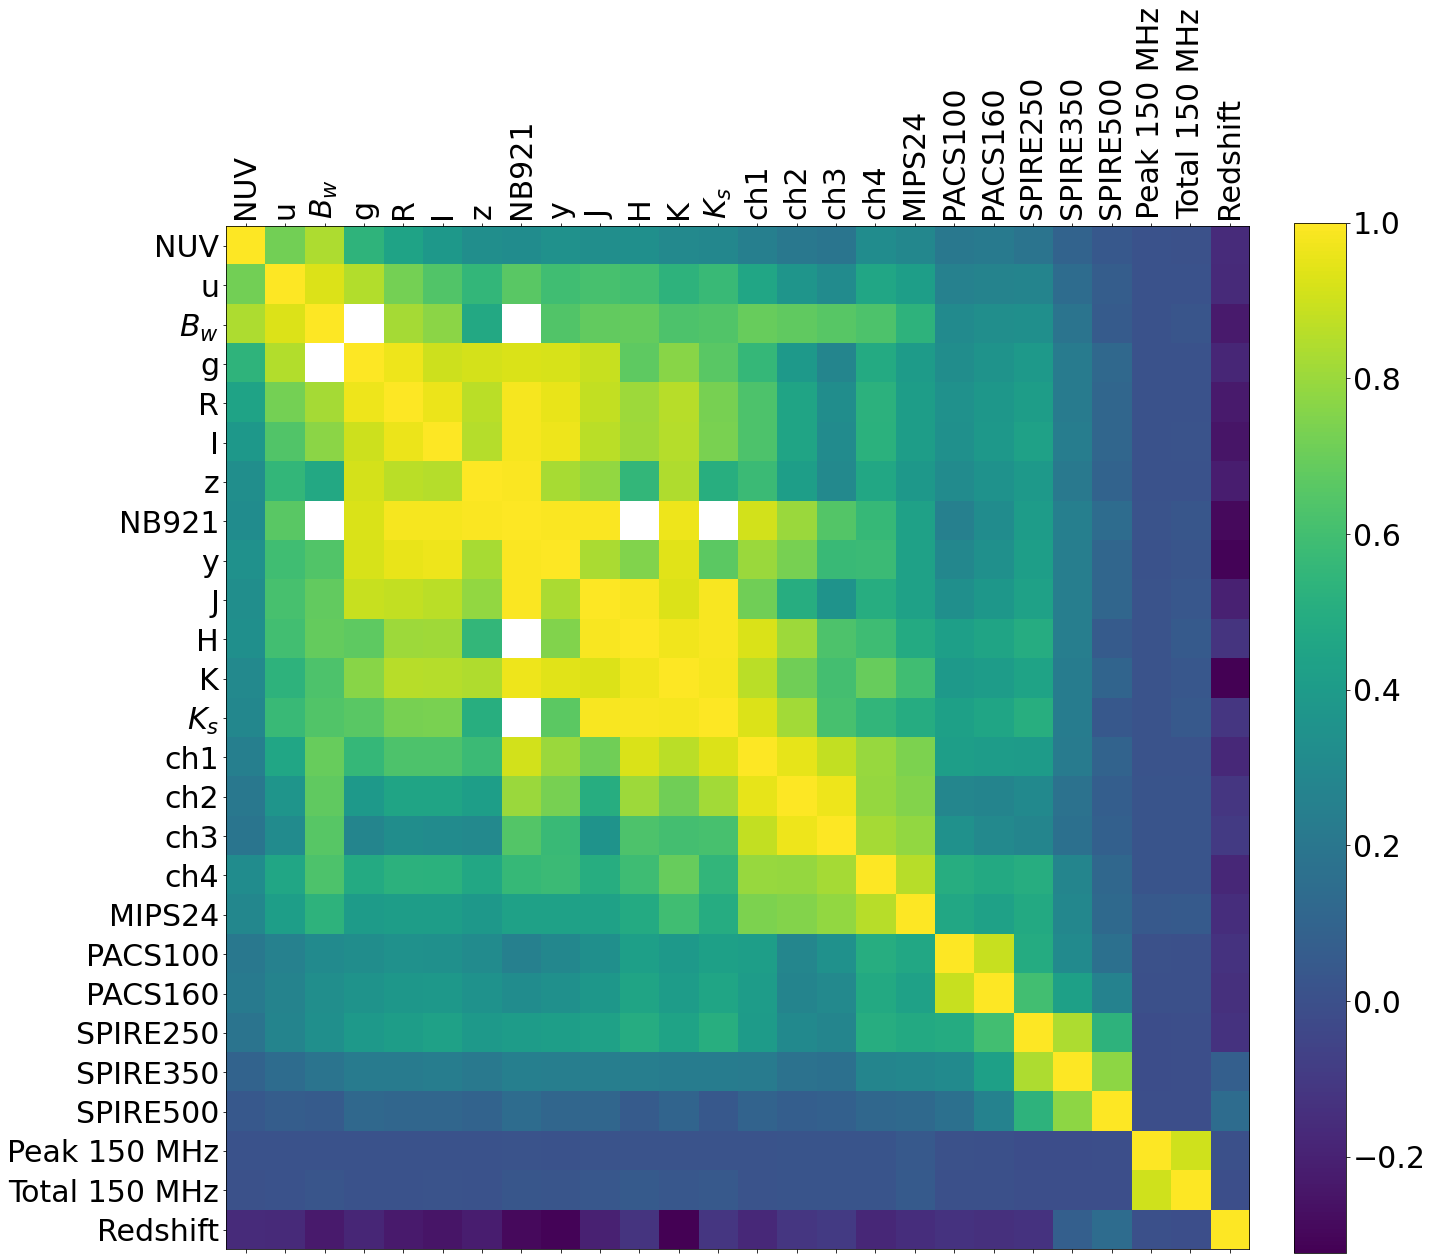

In [7]:
import matplotlib.pyplot as plt
import matplotlib 

# Set font size
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(20, 20))
corr = data.drop(columns='Data_source').corr()

# Creating labels
columns = corr.columns.map(mapping)

corr_plot = ax.matshow(corr)
plt.colorbar(corr_plot, fraction=0.046, pad=0.04)
plt.xticks(range(len(columns)), columns, rotation='vertical')
plt.yticks(range(len(columns)), columns)

plt.tight_layout()

plt.savefig("Correlation.pdf")
plt.savefig("Correlation.png")
plt.show()

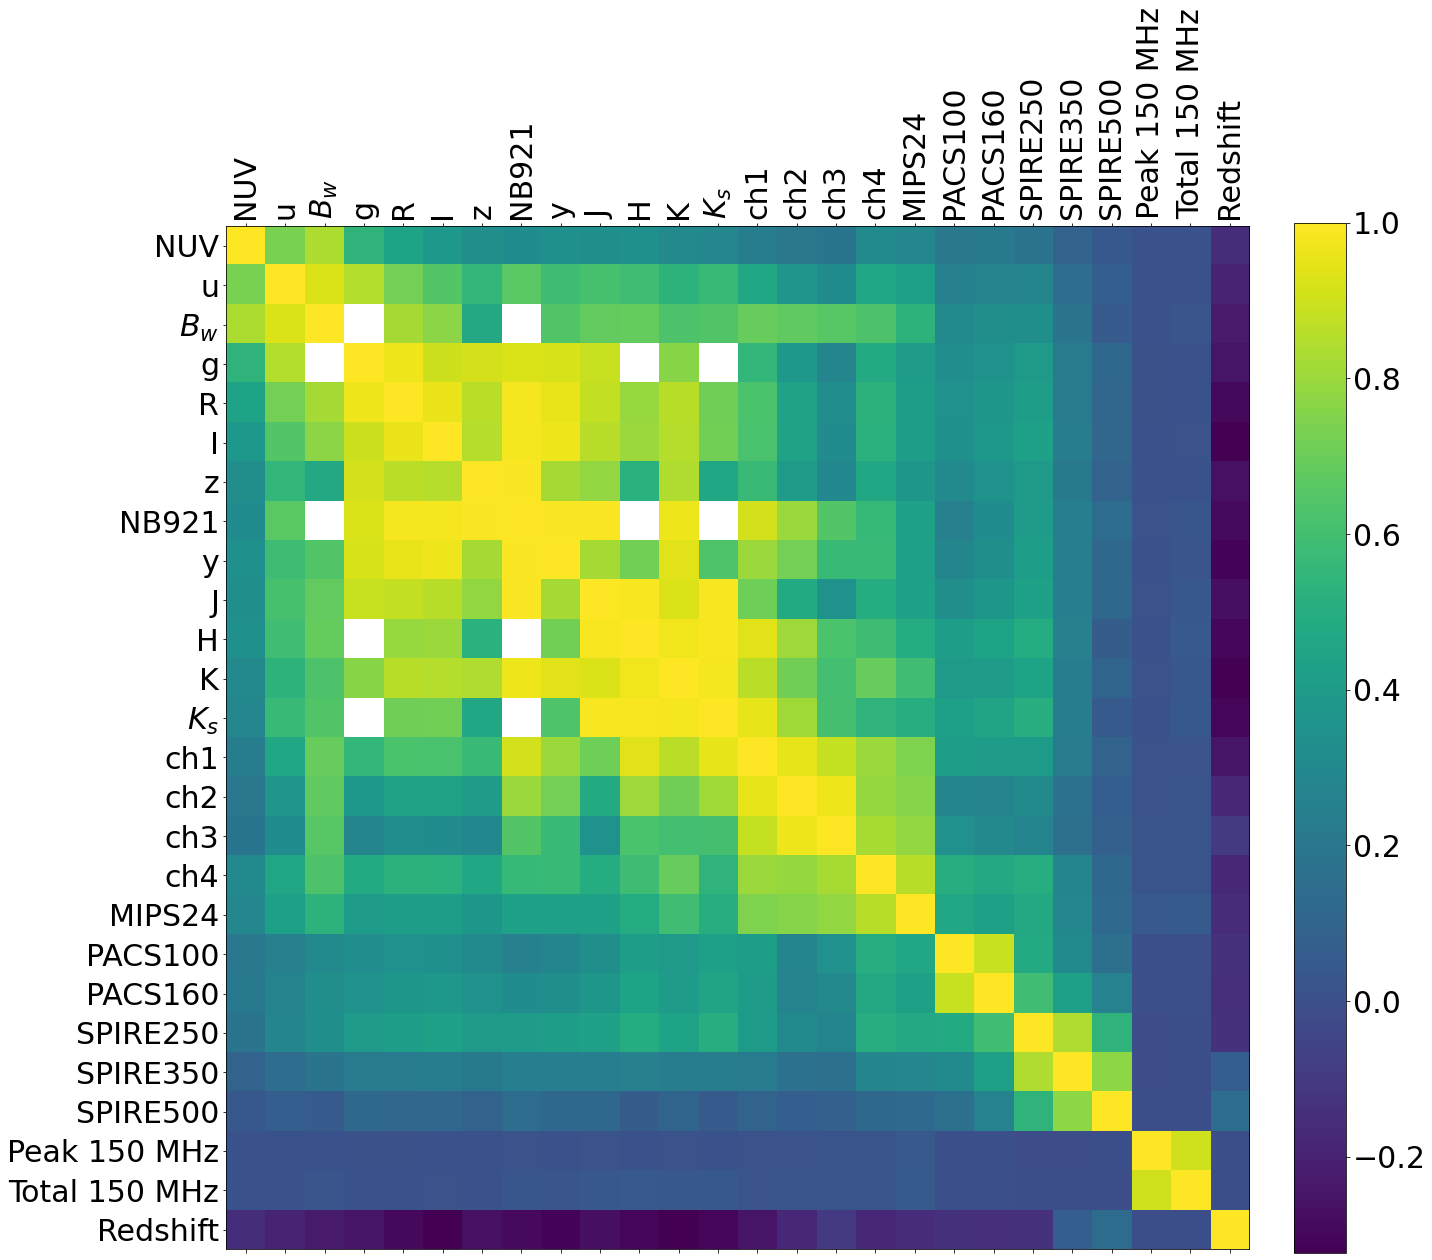

In [8]:
# Just plotting for LOFAR

# Changing the order so it is roughly from low wavelength to high wavelength
data_fangyou = data_fangyou[['NUV_flux_corr', 'u_flux_corr',
       'Bw_flux_corr', 'g_flux_corr', 'R_flux_corr', 'I_flux_corr', 'z_flux_corr', 'nb921_hsc_flux_corr',
       'y_flux_corr', 'J_flux_corr', 'H_flux_corr', 'K_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',
       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',
       'F_SPIRE_350', 'F_SPIRE_500', 'Peak_flux', 'Total_flux', 'Z_BEST', 'Data_source']]

# Set font size
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(20, 20))
corr = data_fangyou.drop(columns='Data_source').corr()

# Creating labels
columns = corr.columns.map(mapping)

corr_plot = ax.matshow(corr)
plt.colorbar(corr_plot, fraction=0.046, pad=0.04)
plt.xticks(range(len(columns)), columns, rotation='vertical')
plt.yticks(range(len(columns)), columns)

plt.tight_layout()

plt.savefig("Correlation.pdf")
plt.savefig("Correlation.png")
plt.show()

In [9]:
from scipy import stats

#Investigating weird J and z non-correlation
# Changing the order so it is roughly from low wavelength to high wavelength
data1 = data_fangyou[['NUV_flux_corr', 'u_flux_corr',
       'Bw_flux_corr', 'g_flux_corr', 'R_flux_corr', 'I_flux_corr', 'z_flux_corr', 'nb921_hsc_flux_corr',
       'y_flux_corr', 'J_flux_corr', 'H_flux_corr', 'K_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',
       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',
       'F_SPIRE_350', 'F_SPIRE_500', 'Peak_flux', 'Total_flux', 'Z_BEST', 'Data_source']]
data2 = data_BH[['u_flux_corr',
       'g_flux_corr', 'R_flux_corr', 'I_flux_corr', 'z_flux_corr',
       'J_flux_corr', 'H_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'Peak_flux', 'Total_flux', 'Z_BEST', 'Data_source']]
data3 = data_mightee[['NUV_flux_corr', 'u_flux_corr',
       'z_flux_corr',
       'y_flux_corr', 'J_flux_corr', 'H_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',
       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',
       'F_SPIRE_350', 'F_SPIRE_500', 'Peak_flux', 'Total_flux', 'Z_BEST', 'Data_source']]

for dat in [data1, data2, data3]:
    filt = (~dat['z_flux_corr'].isna()) & (~dat['J_flux_corr'].isna())
    print('Pearson:',stats.pearsonr(dat['z_flux_corr'][filt], dat['J_flux_corr'][filt])[0])
    
    res = stats.linregress(dat['z_flux_corr'][filt], dat['J_flux_corr'][filt])
    print('Slope:', res.slope)
    print('Intercept:', res.intercept)
    print()

Pearson: 0.7832151235581619
Slope: 1.1516703494293148
Intercept: 11.081641479839512

Pearson: 0.7363390609555418
Slope: 1.6755473986838978
Intercept: -20.8229440390621

Pearson: 0.8833969008727142
Slope: 1.4698524457130435
Intercept: 1.6459296125359266



In [71]:
for c in data1.columns[:-1]:
    if (c in data2):
        if (c in data3):
            print(c, ': Original:', data1[c].median(), 'BH:', data2[c].median(), 'MIGHTEE:', data3[c].median())
        else:
            print(c, ': Original:', data1[c].median(), 'BH:', data2[c].median())

u_flux_corr : Original: 0.612111628 BH: 2.2427682278860464 MIGHTEE: 0.271171005
g_flux_corr : Original: 1.1093952655 BH: 1.6642152310835068
R_flux_corr : Original: 2.3744978905 BH: 2.318926104564574
I_flux_corr : Original: 4.7057373915 BH: 3.4869461210999804
z_flux_corr : Original: 7.401184443 BH: 13.214216721705816 MIGHTEE: 2.5738949499999997
J_flux_corr : Original: 13.97426224 BH: 0.8735511042898986 MIGHTEE: 5.4553213
H_flux_corr : Original: 23.25983655 BH: 1.0876771443718096 MIGHTEE: 8.173732
Ks_flux_corr : Original: 34.96661779 BH: 1.2098470089239322 MIGHTEE: 12.2431345
ch1_flux_corr : Original: 48.63309479 BH: 0.9942984863066412 MIGHTEE: 31.904984
ch2_flux_corr : Original: 45.25525665 BH: 0.7102157439709318 MIGHTEE: 30.561575
Peak_flux : Original: 249.7896639 BH: 12.063924077712409 MIGHTEE: 194.81513456841856
Total_flux : Original: 319.1747183 BH: 49.75788104805669 MIGHTEE: 269.3292057392528
Z_BEST : Original: 1.0336 BH: 0.164835 MIGHTEE: 0.89


In [72]:
for c in data1.columns[:-1]:
    if (c in data2):
        if (c in data3):
            print(c, ': Original:', data1[c].mean(), 'BH:', data2[c].mean(), 'MIGHTEE:', data3[c].mean())
        else:
            print(c, ': Original:', data1[c].mean(), 'BH:', data2[c].mean())

u_flux_corr : Original: 3.1019834638508375 BH: 2.1395316553287285 MIGHTEE: 1.9097173261925706
g_flux_corr : Original: 7.390084406931591 BH: 1.6631374638066392
R_flux_corr : Original: 15.6188644559673 BH: 2.3318986605931755
I_flux_corr : Original: 24.08712697323434 BH: 3.5106528858860075
z_flux_corr : Original: 31.320636742261655 BH: 13.31799019115553 MIGHTEE: 20.97366418688669
J_flux_corr : Original: 46.33287084247801 BH: 1.7235361628139731 MIGHTEE: 32.7621231109385
H_flux_corr : Original: 68.43740993647076 BH: 2.1861768014056917 MIGHTEE: 42.26677545493004
Ks_flux_corr : Original: 85.84839148331092 BH: 2.2353518639163377 MIGHTEE: 52.62813916539459
ch1_flux_corr : Original: 75.67245547064675 BH: 2.3836464071336407 MIGHTEE: 62.55016652944622
ch2_flux_corr : Original: 68.84958639007998 BH: 1.6573510320918772 MIGHTEE: 55.146196874953446
Peak_flux : Original: 1146.9065893649097 BH: 51.99197126657184 MIGHTEE: 445.03518265367006
Total_flux : Original: 2292.389458288809 BH: 203.53239035579486 

In [73]:
data_fangyou['J_flux_corr'].median()

13.97426224

In [74]:
data_BH['J_flux_corr'].describe()

count    12132.000000
mean         1.723536
std          2.290062
min          0.134924
25%          0.503139
50%          0.873551
75%          1.950241
max         25.403194
Name: J_flux_corr, dtype: float64

In [75]:
len(data1)

77609

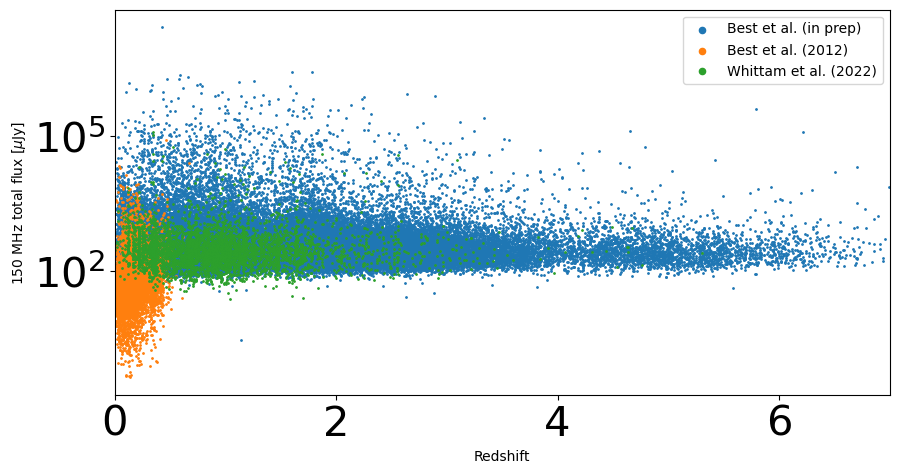

In [76]:
feature1 = 'Z_BEST'
feature2 = 'Total_flux'

plt.figure(figsize=(10,5))
    
plt.scatter(data_fangyou[feature1], data_fangyou[feature2], s=1, label='Best et al. (in prep)')
plt.scatter(data_BH[feature1], data_BH[feature2], s=1, label='Best et al. (2012)')
plt.scatter(data_mightee[feature1], data_mightee[feature2], s=1, label='Whittam et al. (2022)')

plt.xlabel('Redshift')
plt.ylabel(r'150 MHz total flux [$\mu$Jy]')
plt.yscale('log')
plt.xlim(0,7)
lgnd = plt.legend()
for l in lgnd.legendHandles:
    l._sizes = [20]

In [13]:
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)


In [16]:
data['Total_flux_log'] = np.log10(data['Total_flux'])

/var/lib/condor/execute/dir_830810/ipykernel_830890/3581658212.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.ax_joint.set_yticklabels(['', r'$10$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$'])


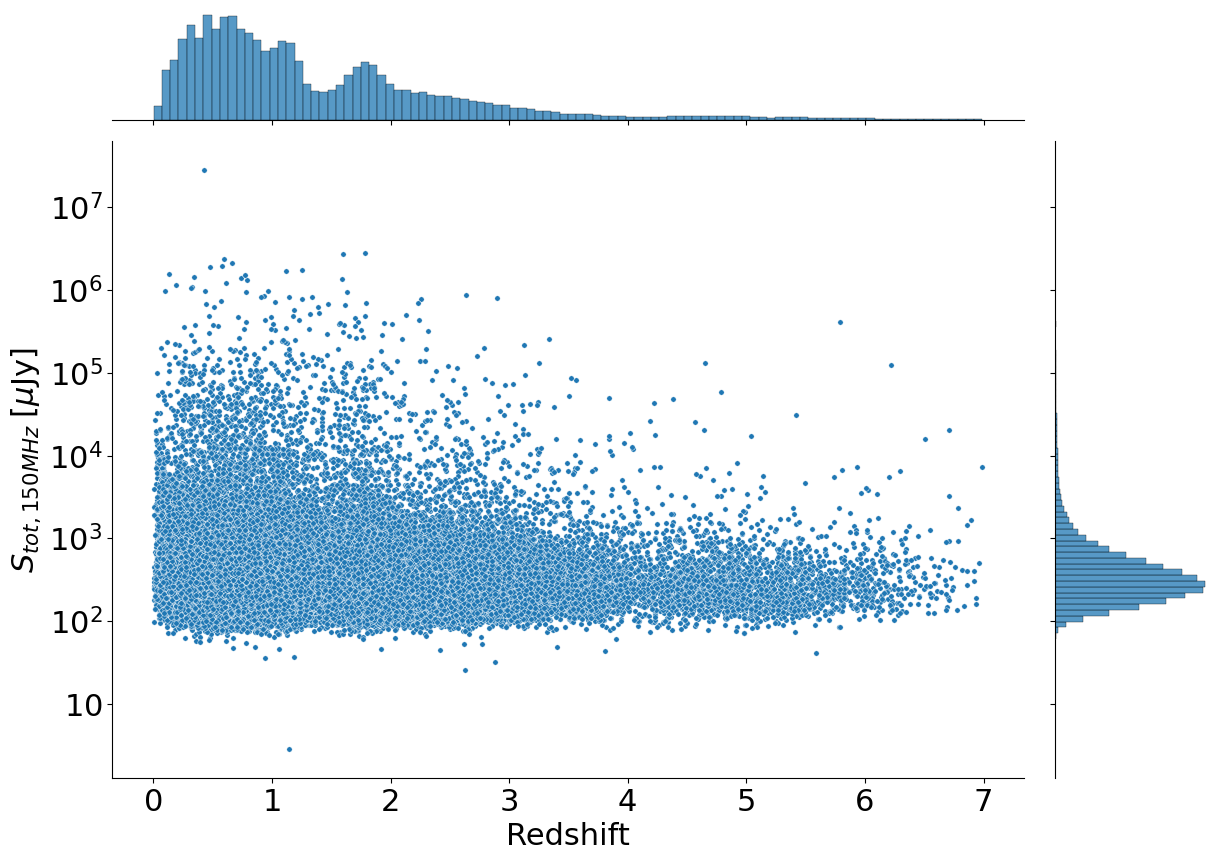

In [30]:
data_fangyou['Total_flux_log'] = np.log10(data_fangyou['Total_flux'])

matplotlib.rcParams.update({'font.size': 22})

s = sns.jointplot(data=data_fangyou, x='Z_BEST', y='Total_flux_log',  
                  marginal_kws=dict(bins=100, stat='probability'), 
                  s=15
                 )
s.fig.set_figwidth(15)
s.fig.set_figheight(10)

# Axes labels
s.ax_joint.set_xlabel(r"Redshift")
s.ax_joint.set_ylabel(r"$S_{tot, 150MHz} \; [\mu$Jy]")

# Setting y-ticks
s.ax_joint.set_yticklabels(['', r'$10$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$'])

s.savefig("Z_vs_total_flux.pdf")
s.savefig("Z_vs_total_flux.png")

In [27]:
dir(s.ax_joint)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_clipon',
 '_clippath',
 '_colorbars',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',

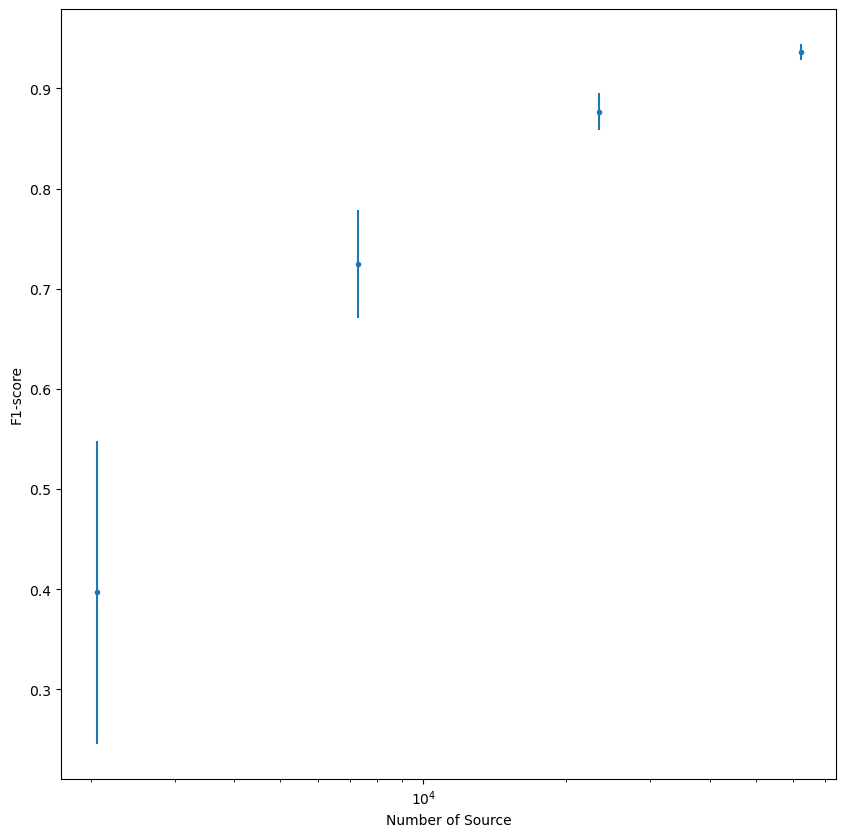

In [22]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count, y=f1, yerr=f1_std, linestyle='', marker='.')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("F1-score")
plt.show()

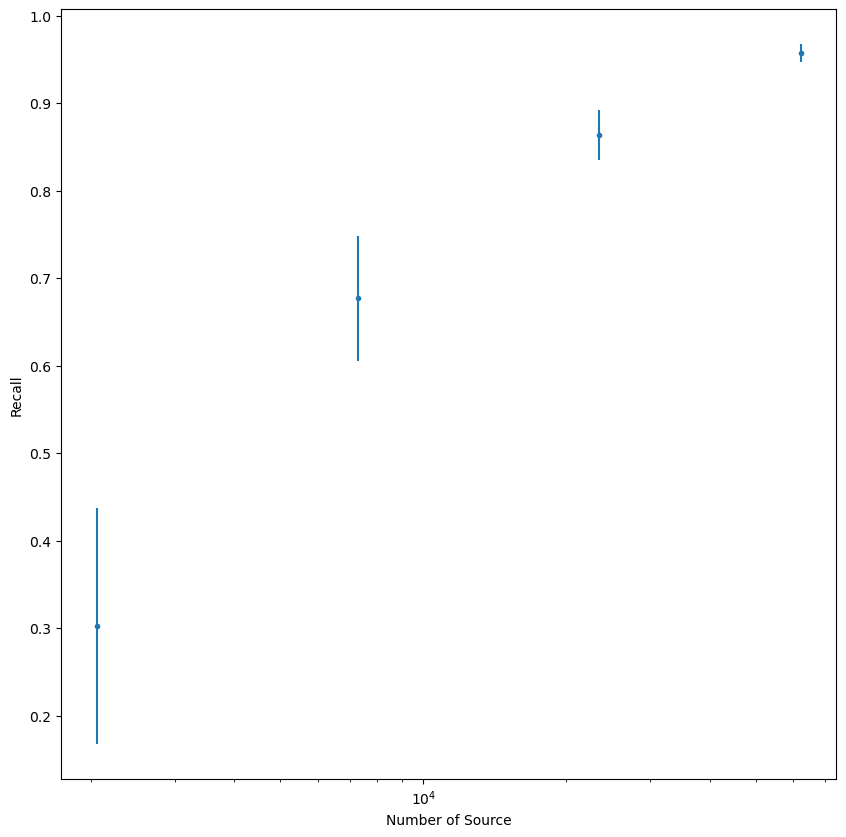

In [21]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count, y=recall, yerr=recall_std, linestyle='', marker='.')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("Recall")
plt.show()

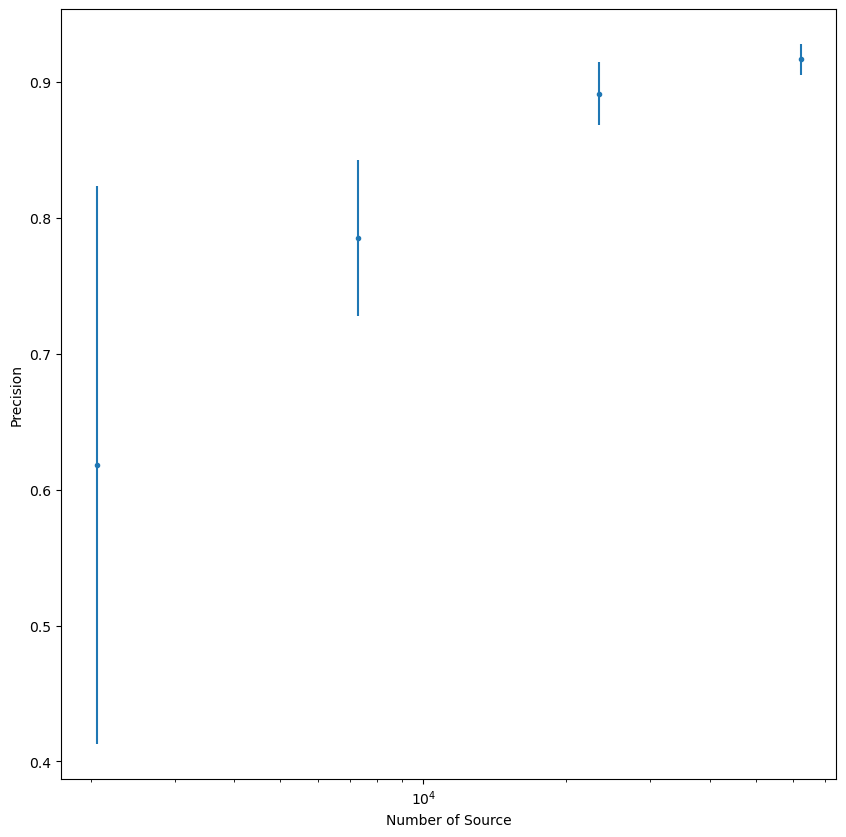

In [20]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count, y=precision, yerr=precision_std, linestyle='', marker='.')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("Precision")
plt.show()

In [19]:
# We can also look at all the data instead, then we have a much simpler plot
# Order is SFG, LERG, RQ, HERG

count = [62342, 23462, 7280, 2056]

precision = [0.9167, 0.8915, 0.7855, 0.6181]
precision_std = [0.0112, 0.0229, 0.0574, 0.2054]
recall = [0.9573, 0.8636, 0.6767, 0.3021]
recall_std = [0.0101, 0.0281, 0.0709, 0.1347]
f1 = [0.9365, 0.8770, 0.7249, 0.3968]
f1_std = [0.0078, 0.0185, 0.0541, 0.1515]

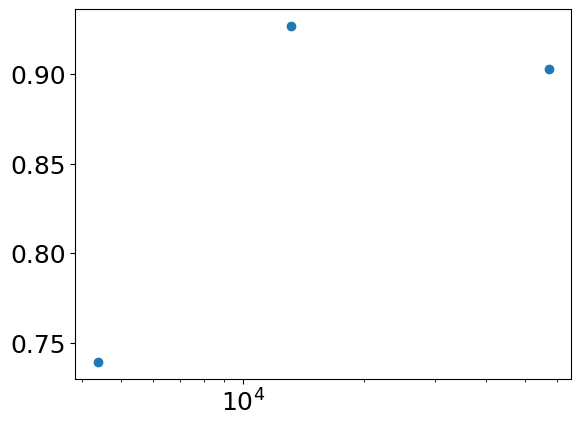

In [23]:
# Additionally we can look at accuracies of whole datasets, but this doesn't work since MIGHTEE has only 3 classes, 
# Additionally accuracy is dominated by data-imbalance within a dataset, so this is useless
counts = [57369, 13161, 4370]
accuracies = [0.9027, 0.92667, 0.7393]

plt.scatter(x=counts, y=accuracies)
plt.xscale('log')

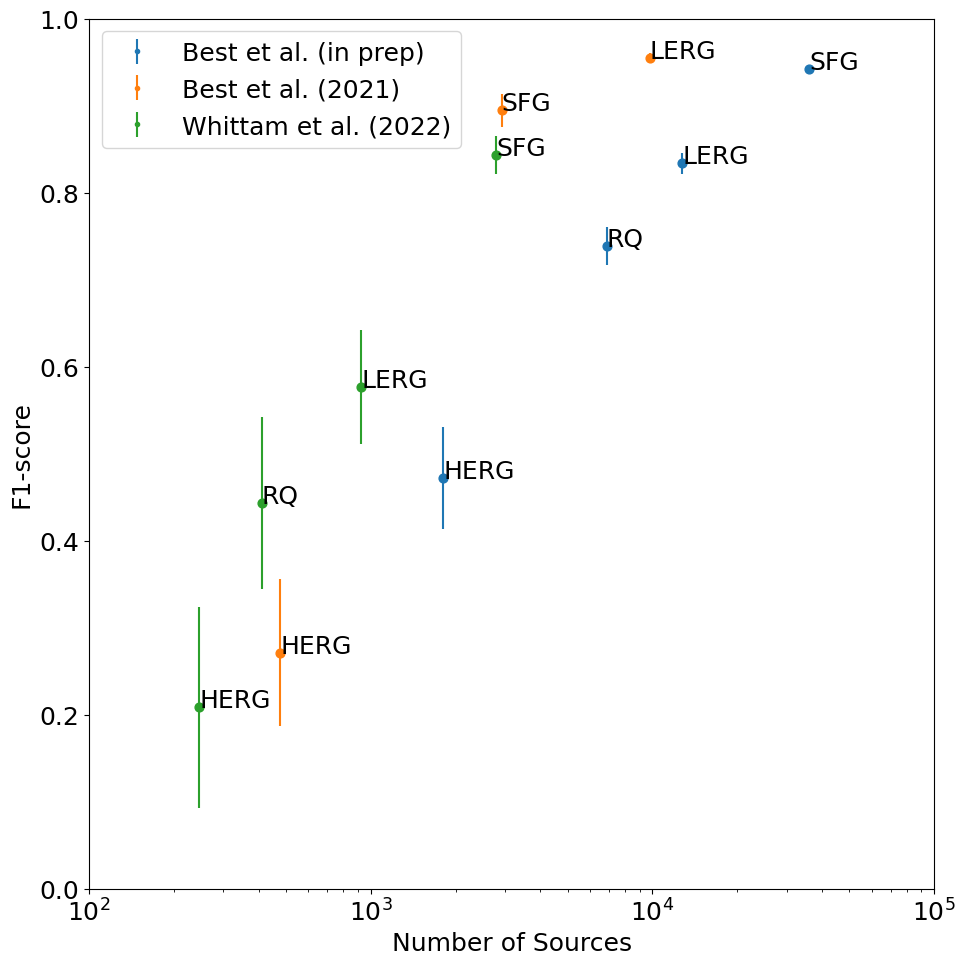

In [22]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,10))
plt.errorbar(x=count_original, y=f1_original, yerr=f1_original_std, linestyle='', marker='.', label='Best et al. (in prep)')
plt.scatter(x=count_original, y=f1_original, s=40)
plt.errorbar(x=count_BH, y=f1_BH, yerr=f1_BH_std, linestyle='', marker='.', label='Best et al. (2021)')
plt.scatter(x=count_BH, y=f1_BH, s=40)
plt.errorbar(x=count_MIGHTEE, y=f1_MIGHTEE, yerr=f1_MIGHTEE_std, linestyle='', marker='.', label='Whittam et al. (2022)')
plt.scatter(x=count_MIGHTEE, y=f1_MIGHTEE, s=40)
plt.xscale('log')
plt.xlabel("Number of Sources")
plt.ylabel("F1-score")
plt.legend()

for i, txt in enumerate(text):
    plt.annotate(txt, (count_original[i], f1_original[i]))
    plt.annotate(txt, (count_MIGHTEE[i], f1_MIGHTEE[i]))
for i, txt in enumerate(text_BH):
    plt.annotate(txt, (count_BH[i], f1_BH[i]))

plt.ylim(0,1)
plt.xlim(100, 10**5)
plt.tight_layout()
plt.savefig('count_dependent_metric.pdf')
plt.show()

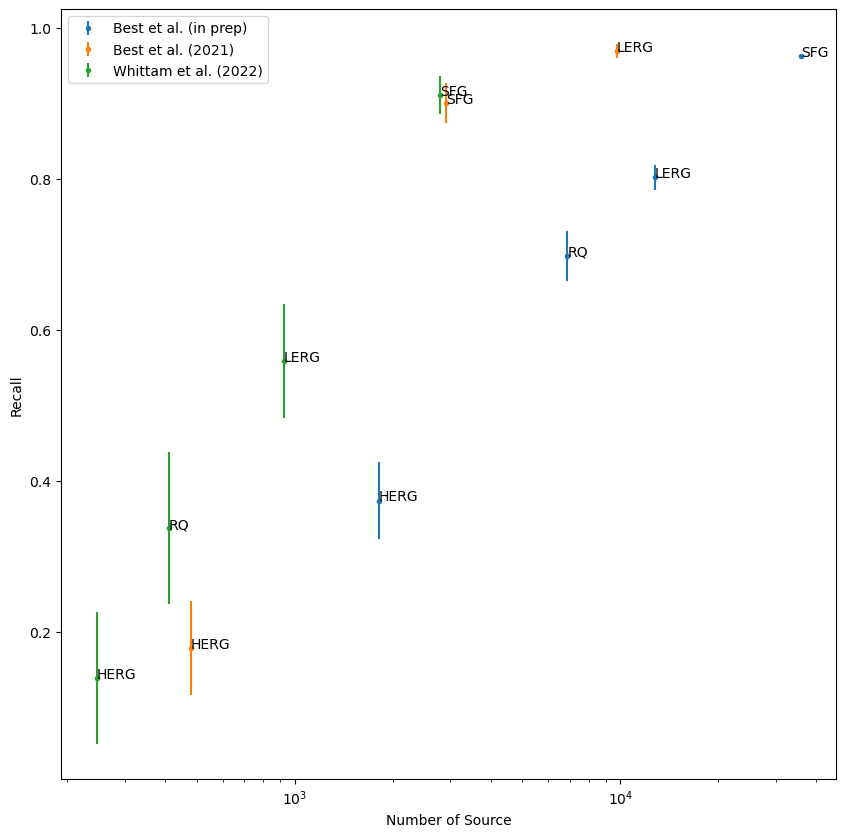

In [21]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count_original, y=recall_original, yerr=recall_original_std, linestyle='', marker='.', label='Best et al. (in prep)')
plt.errorbar(x=count_BH, y=recall_BH, yerr=recall_BH_std, linestyle='', marker='.', label='Best et al. (2021)')
plt.errorbar(x=count_MIGHTEE, y=recall_MIGHTEE, yerr=recall_MIGHTEE_std, linestyle='', marker='.', label='Whittam et al. (2022)')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("Recall")
plt.legend()

for i, txt in enumerate(text):
    plt.annotate(txt, (count_original[i], recall_original[i]))
    plt.annotate(txt, (count_MIGHTEE[i], recall_MIGHTEE[i]))
for i, txt in enumerate(text_BH):
    plt.annotate(txt, (count_BH[i], recall_BH[i]))
    
plt.show()

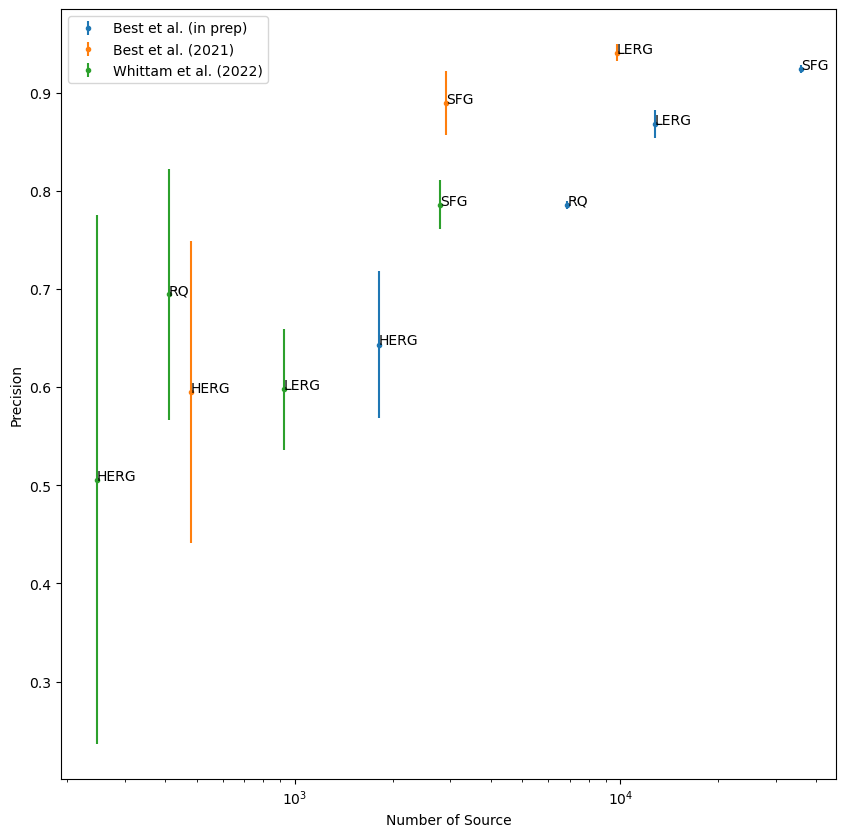

In [20]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count_original, y=precision_original, yerr=precision_original_std, linestyle='', marker='.', label='Best et al. (in prep)')
plt.errorbar(x=count_BH, y=precision_BH, yerr=precision_BH_std, linestyle='', marker='.', label='Best et al. (2021)')
plt.errorbar(x=count_MIGHTEE, y=precision_MIGHTEE, yerr=precision_MIGHTEE_std, linestyle='', marker='.', label='Whittam et al. (2022)')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("Precision")
plt.legend()

for i, txt in enumerate(text):
    plt.annotate(txt, (count_original[i], precision_original[i]))
    plt.annotate(txt, (count_MIGHTEE[i], precision_MIGHTEE[i]))
for i, txt in enumerate(text_BH):
    plt.annotate(txt, (count_BH[i], precision_BH[i]))

plt.show()

In [19]:
# Order is SFG, LERG, RQ, HERG

count_original = [35922, 12767, 6870, 1810]
count_BH = [2912, 9771, 478]
count_MIGHTEE = [2790, 924, 410, 246]

precision_original = [0.9242, 0.8681, 0.7858, 0.6433]
precision_original_std = [0.0040, 0.0146, 0.0040, 0.07461]
recall_original = [0.9617, 0.8018, 0.6974, 0.3735]
recall_original_std = [0.0026, 0.0164, 0.0328, 0.0507]
f1_original = [0.9425, 0.8335, 0.7386, 0.4719]
f1_original_std = [0.0023, 0.0117, 0.0220, 0.0589]

precision_BH = [0.8897, 0.9407, 0.5953]
precision_BH_std = [0.0326, 0.0087, 0.1539]
recall_BH = [0.9004, 0.9688, 0.1784]
recall_BH_std = [0.0264, 0.0092, 0.0617]
f1_BH = [0.8944, 0.9545, 0.2711]
f1_BH_std = [0.0187, 0.0053, 0.0844]

precision_MIGHTEE = [0.7856, 0.5976, 0.6944, 0.5055]
precision_MIGHTEE_std = [0.0249, 0.0613, 0.1277, 0.2693]
recall_MIGHTEE = [0.9108, 0.5587, 0.3368, 0.1386]
recall_MIGHTEE_std = [0.0253, 0.0753, 0.1006, 0.0876]
f1_MIGHTEE = [0.8434, 0.5765, 0.4431, 0.2083]
f1_MIGHTEE_std = [0.0220, 0.0655, 0.0987, 0.1156]

text = ['SFG', 'LERG', 'RQ', 'HERG']
text_BH = ['SFG', 'LERG', 'HERG']

In [18]:
labels = ['SFG', 'LERG', 'RQ', 'HERG']
cm = [
    [0.9572, 0.8636, 0.6767, 0.3021],
    [],
    [],
    [],
]

## Score dependence

KeyboardInterrupt: 

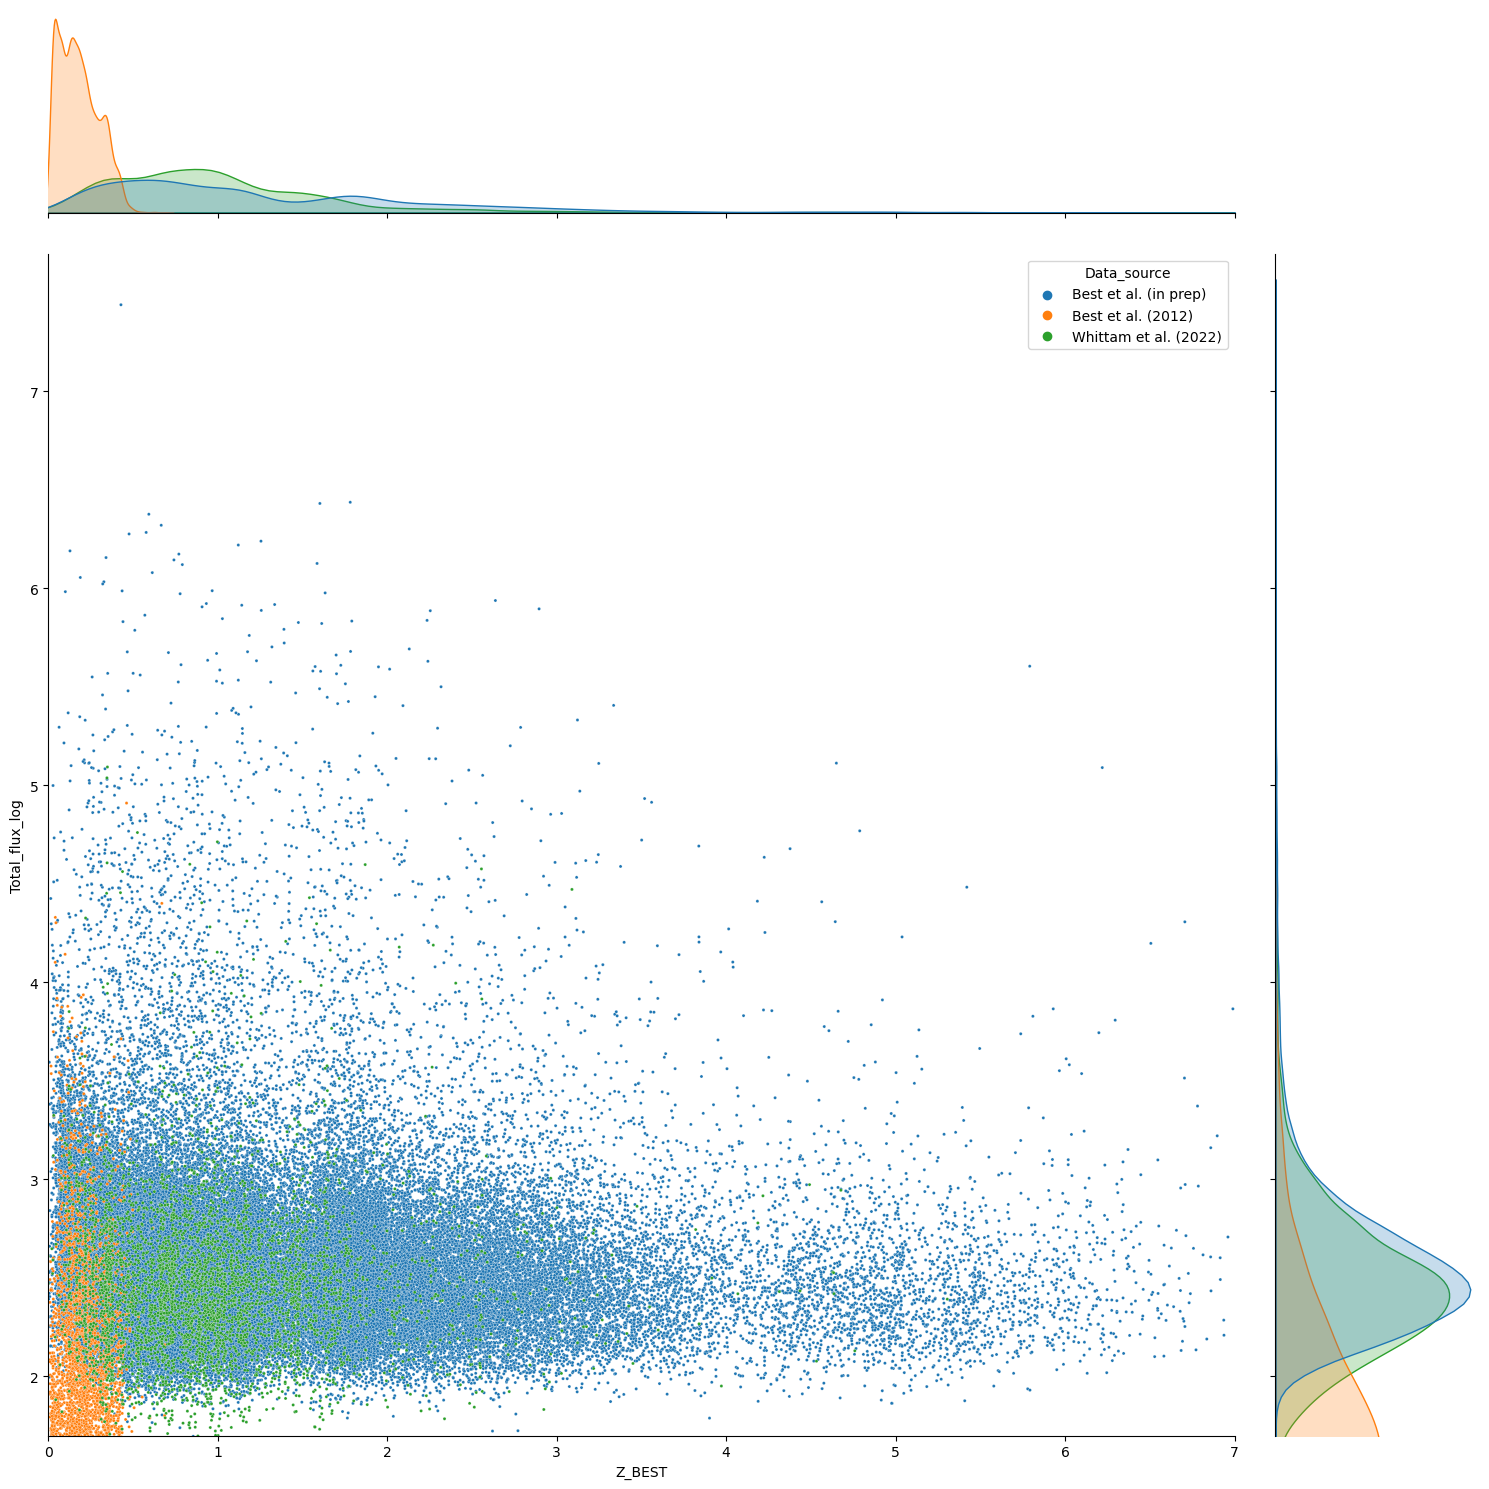

In [20]:
feature1 = 'Z_BEST'
feature2 = 'Total_flux'

data['Total_flux_log'] = np.log10(data['Total_flux'])

s = sns.jointplot(data=data, x=feature1, y='Total_flux_log', hue='Data_source', 
                  #kind='hist', 
                  marginal_ticks=False, xlim=(0, 7), ylim=(np.log10(50),np.log10(5*10**7)), s=5, height=15, zorder=1,
                 #marginal_kws=dict(bins=100, common_bins=True, stat='probability', common_norm=False))
                  marginal_kws=dict(common_norm=False))

# Best et al. (in prep)
dat = data[data['Data_source']=='Best et al. (in prep)']
s.x = dat[feature1]
s.y = dat['Total_flux_log']
s.plot_joint(sns.kdeplot, color="b", zorder=5, levels=300, fill=True, legend=False)

s.x = dat[feature1]
s.y = dat['Total_flux_log']
s.plot_joint(sns.scatterplot, color="#8e9ec1", zorder=4, s=5, legend=False)

# Whittam et al. (2022)
dat = data[data['Data_source']=='Whittam et al. (2022)']

s.x = dat[feature1]
s.y = dat['Total_flux_log']
s.plot_joint(sns.scatterplot, color="g", zorder=6, s=5, legend=False)


s.set_axis_labels(r"Redshift", r"$S_{tot, 150MHz} \; [\mu$Jy]")

# Marginal axes labels
s.ax_marg_y.set_xlabel('')
s.ax_marg_x.set_ylabel('')

# Setting figsize
s.fig.set_figwidth(10)
s.fig.set_figheight(5)

# Removing legend title
s.ax_joint.legend_.set_title(None)

# Setting y-ticks
s.ax_joint.set_yticklabels(['', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$'])

# Limit z
#s.set()

# Saving figure
s.savefig("Z_vs_total_flux.pdf")
s.savefig("Z_vs_total_flux.png")

plt.show()

(1.0, 7.698970004336019)

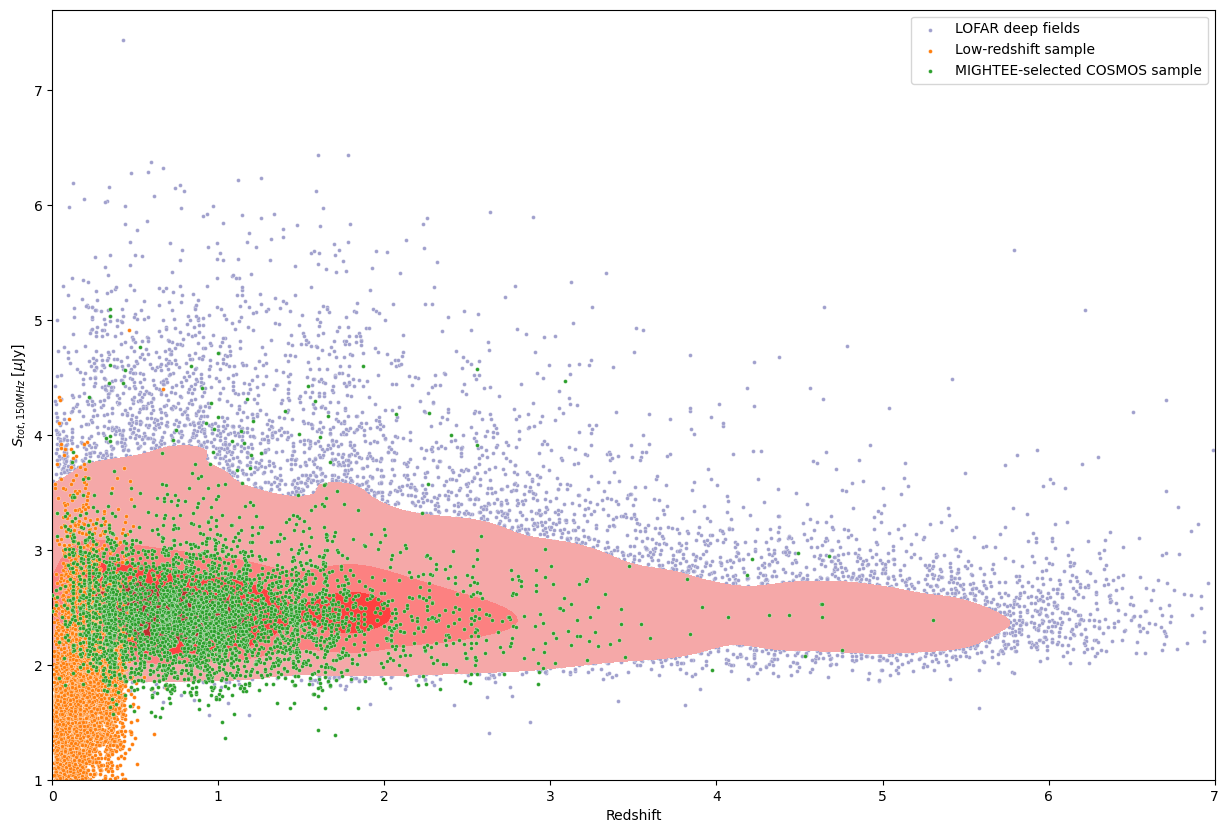

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))

# Original
dat = data[data['Data_source']=='Best et al. (in prep)']
sns.kdeplot(x=dat['Z_BEST'], y=dat['Total_flux_log'], color="r", zorder=1, levels=5, fill=True, legend=False)
sns.scatterplot(x=dat['Z_BEST'], y=dat['Total_flux_log'], color="#a0a0cd", s=8, zorder=0, label='LOFAR deep fields')

# Best
dat = data[data['Data_source']=='Best et al. (2012)']
sns.scatterplot(x=dat['Z_BEST'], y=dat['Total_flux_log'], color='#ff7f0e', s=8, zorder=2, label='Low-redshift sample')

# Whittam
dat = data[data['Data_source']=='Whittam et al. (2022)']
sns.scatterplot(x=dat['Z_BEST'], y=dat['Total_flux_log'], color='#2ca02c', s=8, zorder=3, label='MIGHTEE-selected COSMOS sample')

ax.set_xlabel(r"Redshift")
ax.set_ylabel(r"$S_{tot, 150MHz} \; [\mu$Jy]")

# Setting y-ticks
ax.set_yticks(range(1,9))
#ax.set_yticklabels([r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$'])

# Axes limits
ax.set_xlim(0, 7)
ax.set_ylim(np.log10(10),np.log10(5*10**7))

In [99]:
dir(s.figure)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_cachedRenderer',
 '_callbacks',
 '_canvas_callbacks',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_get_draw_artists',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutgrid',
 '_localaxes',
 '_mouseover',
 '_normalize_grid_string',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_rasterized',
 '_r

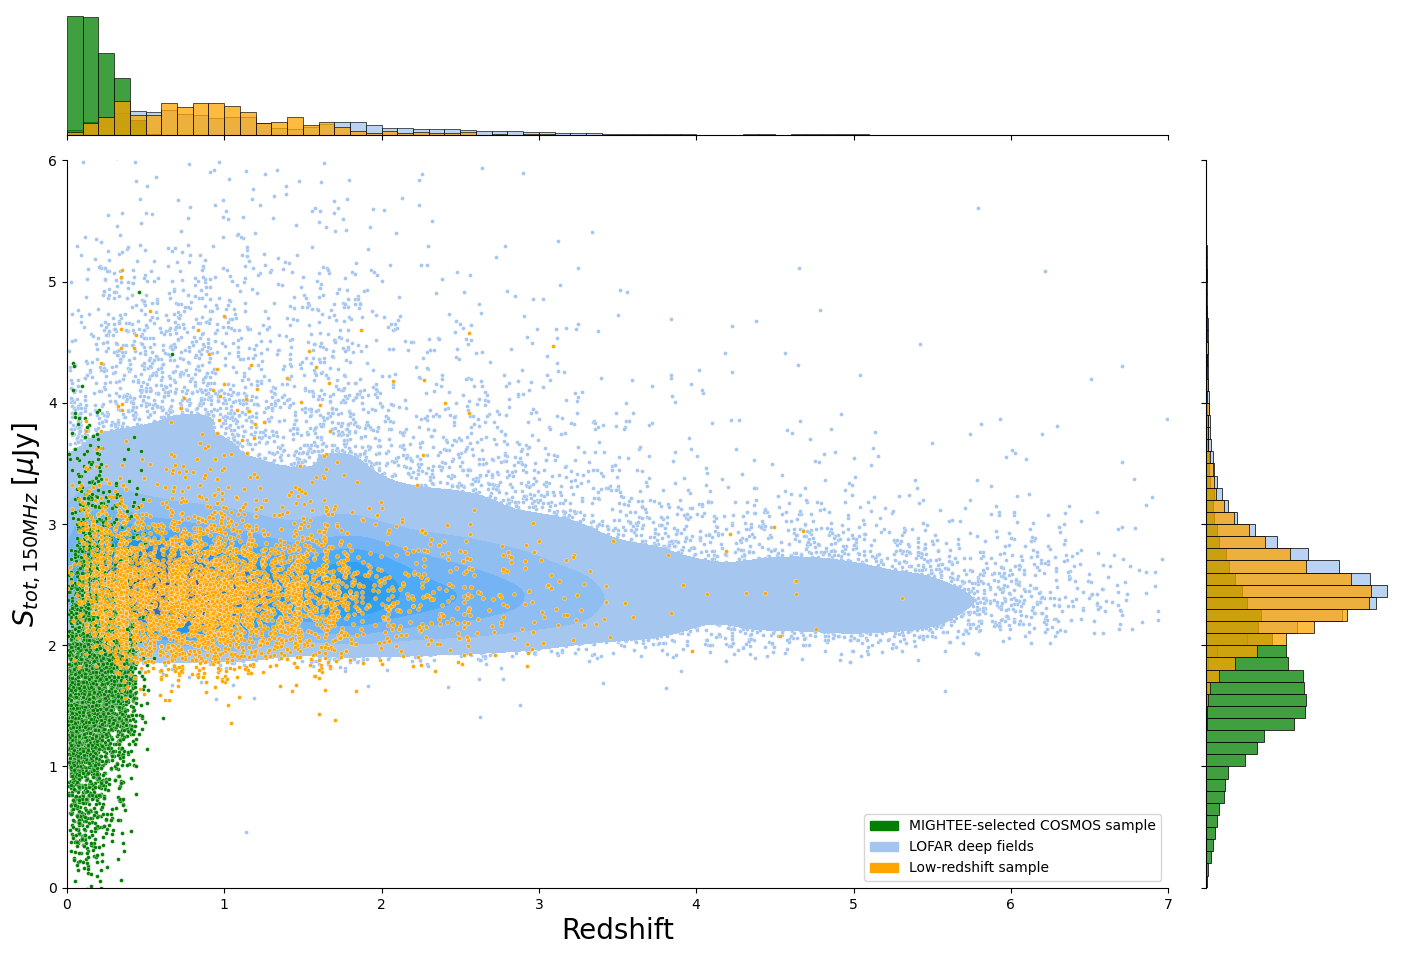

In [102]:
import matplotlib.patches as mpatches

bins=np.arange(0,7.2,0.1)
# LOFAR
dat = data[data['Data_source']=='Best et al. (in prep)']
s = sns.jointplot(data=dat, x='Z_BEST', y='Total_flux_log', xlim=(0, 7), ylim=(0,6), color='#A4C5EF',
                  marginal_kws=dict(bins=bins, stat='probability'), s=8
                 )
s.plot_joint(sns.kdeplot, fill=True, levels=10, thresh=0.05)


# BH
dat = data[data['Data_source']=='Best et al. (2012)']
s.x = dat['Z_BEST']
s.y = dat['Total_flux_log']
s.plot_joint(sns.scatterplot, color='g', s=8)
s.plot_marginals(sns.histplot, color='g', bins=bins, stat='probability', label='Low-redshift sample')

# MIGHTEE
dat = data[data['Data_source']=='Whittam et al. (2022)']
s.x = dat['Z_BEST']
s.y = dat['Total_flux_log']
s.plot_joint(sns.scatterplot, color='orange', s=8)
s.plot_marginals(sns.histplot, color='orange', bins=bins, stat='probability', label='MIGHTEE-selected COSMOS sample')


# Setting figure size
s.fig.set_figwidth(15)
s.fig.set_figheight(10)

# Axes labels
s.ax_joint.set_xlabel(r"Redshift", fontsize=20)
s.ax_joint.set_ylabel(r"$S_{tot, 150MHz} \; [\mu$Jy]", fontsize=20)

green = mpatches.Patch(color='g', label='MIGHTEE-selected COSMOS sample')
blue = mpatches.Patch(color='#A4C5EF', label='LOFAR deep fields')
orange = mpatches.Patch(color='orange', label='Low-redshift sample')
s.ax_joint.legend(handles=[green, blue, orange])

s.figure.savefig("Z_vs_total_flux.png", dpi=300, bbox_inches='tight')

In [18]:
data_fangyou['Source']

0         Bootes
1         Bootes
2         Bootes
3         Bootes
4         Bootes
          ...   
77604    Lockman
77605    Lockman
77606    Lockman
77607    Lockman
77608    Lockman
Name: Source, Length: 77609, dtype: object

In [16]:
dir(s)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_figure',
 '_hue_params',
 '_inject_kwargs',
 'ax_joint',
 'ax_marg_x',
 'ax_marg_y',
 'fig',
 'figure',
 'hue',
 'plot',
 'plot_joint',
 'plot_marginals',
 'refline',
 'savefig',
 'set',
 'set_axis_labels',
 'x',
 'y']